# Context and Problem Statement

Customer satisfaction is an important factor for a business. Happy customers bring value and more revenue. For the airline industry, cost and customer satisfaction plays a pivotal role. It’s important that customers have an excellent experience every time they travel. 
The data we have at hand is of passengers and their feedback regarding their flight experience. Each row is one passenger. Apart from the feedback from the customers across various attributes(15 in total) like food, online_support, cleanliness etc, we have data about the customers' age, loyalty to the airline, gender and class.
The target column is a binary variable which tells us if the customer is satisfied or neutral/dissatisfied.
We will analyse various features to understand which features are contributing to the satisfaction of the customers.


# Steps - 
1. Data loading and preprocessing
2. Exploratory Data Analysis
3. Model building and evaluation
4. Model Tuning
5. Dimensionality Reduction

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data loading and preprocessing

### 1. Import Pandas, Numpy, pyplot and seaborn

In [0]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Import the dataframes that are needed
- Import "Flight data_Train.csv" and "Surveydata_Train.csv"

In [0]:
df1 = pd.read_csv("gdrive/My Drive/AIML_RS_CSV/Samsung/Flight_data.csv")  # Read the data regarding customer attributes
df2 = pd.read_csv("gdrive/My Drive/AIML_RS_CSV/Samsung/Survey_data.csv")   # Feedback data from customers

In [0]:
df1.shape

(90917, 9)

In [0]:
df1.head(2)

,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0


In [0]:
df2.shape

(90917, 16)

In [0]:
df2.head(2)

,Id,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor
1,193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable


### 3. Join the two dataframes using the 'id' column as the primary key
- Rename the Id column of one dataframe so that there "id" column name becomes same

In [0]:
#Using pandas' Join method
#c = a.join(b)  # Joining two dfs on the 'Id' column

df = df2.set_index("Id").join(df1.set_index("ID"))


print(df.shape)
df.head()  # the combined dataframe

(90917, 23)


,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Id,,,,,,,,,,,,,,,,,,,,,,,
198671,neutral or dissatisfied,poor,acceptable,acceptable,manageable,poor,need improvement,poor,poor,acceptable,acceptable,poor,need improvement,need improvement,poor,Male,Loyal Customer,30,Business travel,Business,1354,11,8.0
193378,satisfied,excellent,need improvement,excellent,Convinient,acceptable,excellent,acceptable,acceptable,good,acceptable,excellent,acceptable,excellent,acceptable,Female,disloyal Customer,20,NaN,Business,1439,6,0.0
174522,satisfied,good,good,good,manageable,acceptable,excellent,excellent,need improvement,need improvement,good,need improvement,excellent,need improvement,excellent,Female,NaN,55,Personal Travel,Eco Plus,976,4,0.0
191830,satisfied,good,good,good,manageable,poor,good,poor,poor,poor,good,poor,acceptable,acceptable,poor,Male,disloyal Customer,24,Business travel,Eco,2291,0,0.0
221497,satisfied,good,good,NaN,Convinient,good,good,good,good,good,good,good,excellent,good,good,Male,Loyal Customer,32,Business travel,Business,3974,0,0.0


### 3.1 Another Way to merge two DFs

In [0]:
# Using pandas' concat method
# Because the Id columns are not in the same order in the two dataframes, first we sort them and then concat

a = df1.sort_values(by = 'ID')   
b = df2.sort_values(by = 'Id')

b.reset_index(drop = True, inplace = True)    # reset the index so that it doesn't cause a problem while concatenating

# Now that we are confident that both dataframes are in the same order, drop the Id column in the second dataframe
b.drop(columns = 'Id', inplace = True)         

c = pd.concat([a,b], axis = 1)   # Concat!!!

print(c.shape)
c.head()

(90917, 24)


,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


### 3.2 Another Way

In [0]:
# using pd.merge

a = df1.copy(deep = True)
b = df2.copy(deep = True)

c = a.merge(b, left_on='ID', right_on='Id').drop(columns = 'Id')

print(c.shape)
c.head()

(90917, 24)


,ID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


### 4. Print the number of missing values in each of the columns

In [0]:
df.isna().apply(pd.value_counts)    # isna() gives a boolean dataframe, value counts give us number of trues and falses

,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
False,90917.0,90917.0,82673,82736,90917.0,90917.0,90917.0,90917.0,90917.0,83738,90917.0,90917.0,90917.0,90917.0,90917.0,90917.0,81818,90917.0,81829,90917.0,90917.0,90917.0,90633
True,NaN,NaN,8244,8181,NaN,NaN,NaN,NaN,NaN,7179,NaN,NaN,NaN,NaN,NaN,NaN,9099,NaN,9088,NaN,NaN,NaN,284


In [0]:
df.isna().sum() # Since True is 1 and False is 0, if you do a sum of a boolean dataframe, we get the number of trues in each col

Satisfaction                            0
Seat_comfort                            0
Departure.Arrival.time_convenient    8244
Food_drink                           8181
Gate_location                           0
Inflightwifi_service                    0
Inflight_entertainment                  0
Online_support                          0
Ease_of_Onlinebooking                   0
Onboard_service                      7179
Leg_room_service                        0
Baggage_handling                        0
Checkin_service                         0
Cleanliness                             0
Online_boarding                         0
Gender                                  0
CustomerType                         9099
Age                                     0
TypeTravel                           9088
Class                                   0
Flight_Distance                         0
DepartureDelayin_Mins                   0
ArrivalDelayin_Mins                   284
dtype: int64

### 5. Drop all the rows having atleast one missing values and check the shape of the dataframe before and after dropping the rows
- Fill null values in ArrivalDelayin_Mins with mean
- After that drop all the rows with null values

In [0]:
# Since there are very less null values in the 'ArrivalDelayin_Mins' column, lets impute with mean

df.ArrivalDelayin_Mins.fillna(df.ArrivalDelayin_Mins.mean(), inplace = True)

# Alternate way - 1

df.ArrivalDelayin_Mins.replace({np.nan  : df.ArrivalDelayin_Mins.mean()}, inplace = True)

# Alternate way - 2

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') 

df['ArrivalDelayin_Mins'] = imputer.fit_transform(df['ArrivalDelayin_Mins'].values.reshape(-1,1))

### The imputer algorithm takes n-dimensional array and since it was throwing an error asking to reshape. Hence the reshape


In [0]:
df.ArrivalDelayin_Mins.isna().sum()

0

In [0]:
# Rest other missing values are filled with not_captured.
#It can be done in other way also or also can be dropped according to the problem and business context.
df.fillna("not_captured", inplace = True) 


In [0]:
print(df.shape)

(90917, 23)


In [0]:
df.isna().sum()

Satisfaction                         0
Seat_comfort                         0
Departure.Arrival.time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Gender                               0
CustomerType                         0
Age                                  0
TypeTravel                           0
Class                                0
Flight_Distance                      0
DepartureDelayin_Mins                0
ArrivalDelayin_Mins                  0
dtype: int64

# Exploratory Data Analysis

### 6. Print correlation

In [0]:
cor = df.corr() # It will show correlation of only numerical variables here.

In [0]:
cor[cor > .90]

,Age,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
Age,1.0,NaN,NaN,NaN
Flight_Distance,NaN,1.0,NaN,NaN
DepartureDelayin_Mins,NaN,NaN,1.00000,0.96112
ArrivalDelayin_Mins,NaN,NaN,0.96112,1.00000


In [0]:
to_drop = ['DepartureDelayin_Mins']

- There is just one obvious correlation that we can see that is between arrival delay and departure delay

### Feedback columns
Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
'Baggage_handling', 'Checkin_service', 'Cleanliness', 'Online_boarding'

### 7. Manually encode these variables(printed above) such that they follow an order based on the meaning. 
### Example: awful = 1, unpleasent = 2, decent = 3, good = 4, great = 5

In [0]:
# Manual label encoding
# It is a bit of a subjective task. Hence, go ahead in the way you find appropriate

df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5, 'not_captured' : 2}, inplace = True)  

df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [0]:
df['Departure.Arrival.time_convenient'].value_counts()

2    22783
4    18840
5    17079
3    14806
1    13210
0     4199
Name: Departure.Arrival.time_convenient, dtype: int64

### 8. Display countplot of every feedback attribute with respect to Customer Satisfaction. 

You can use sns.countplot and set hue  = 'Satisfaction'

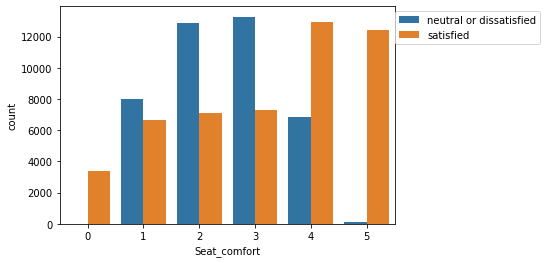

In [0]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(df.Seat_comfort, hue = df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position



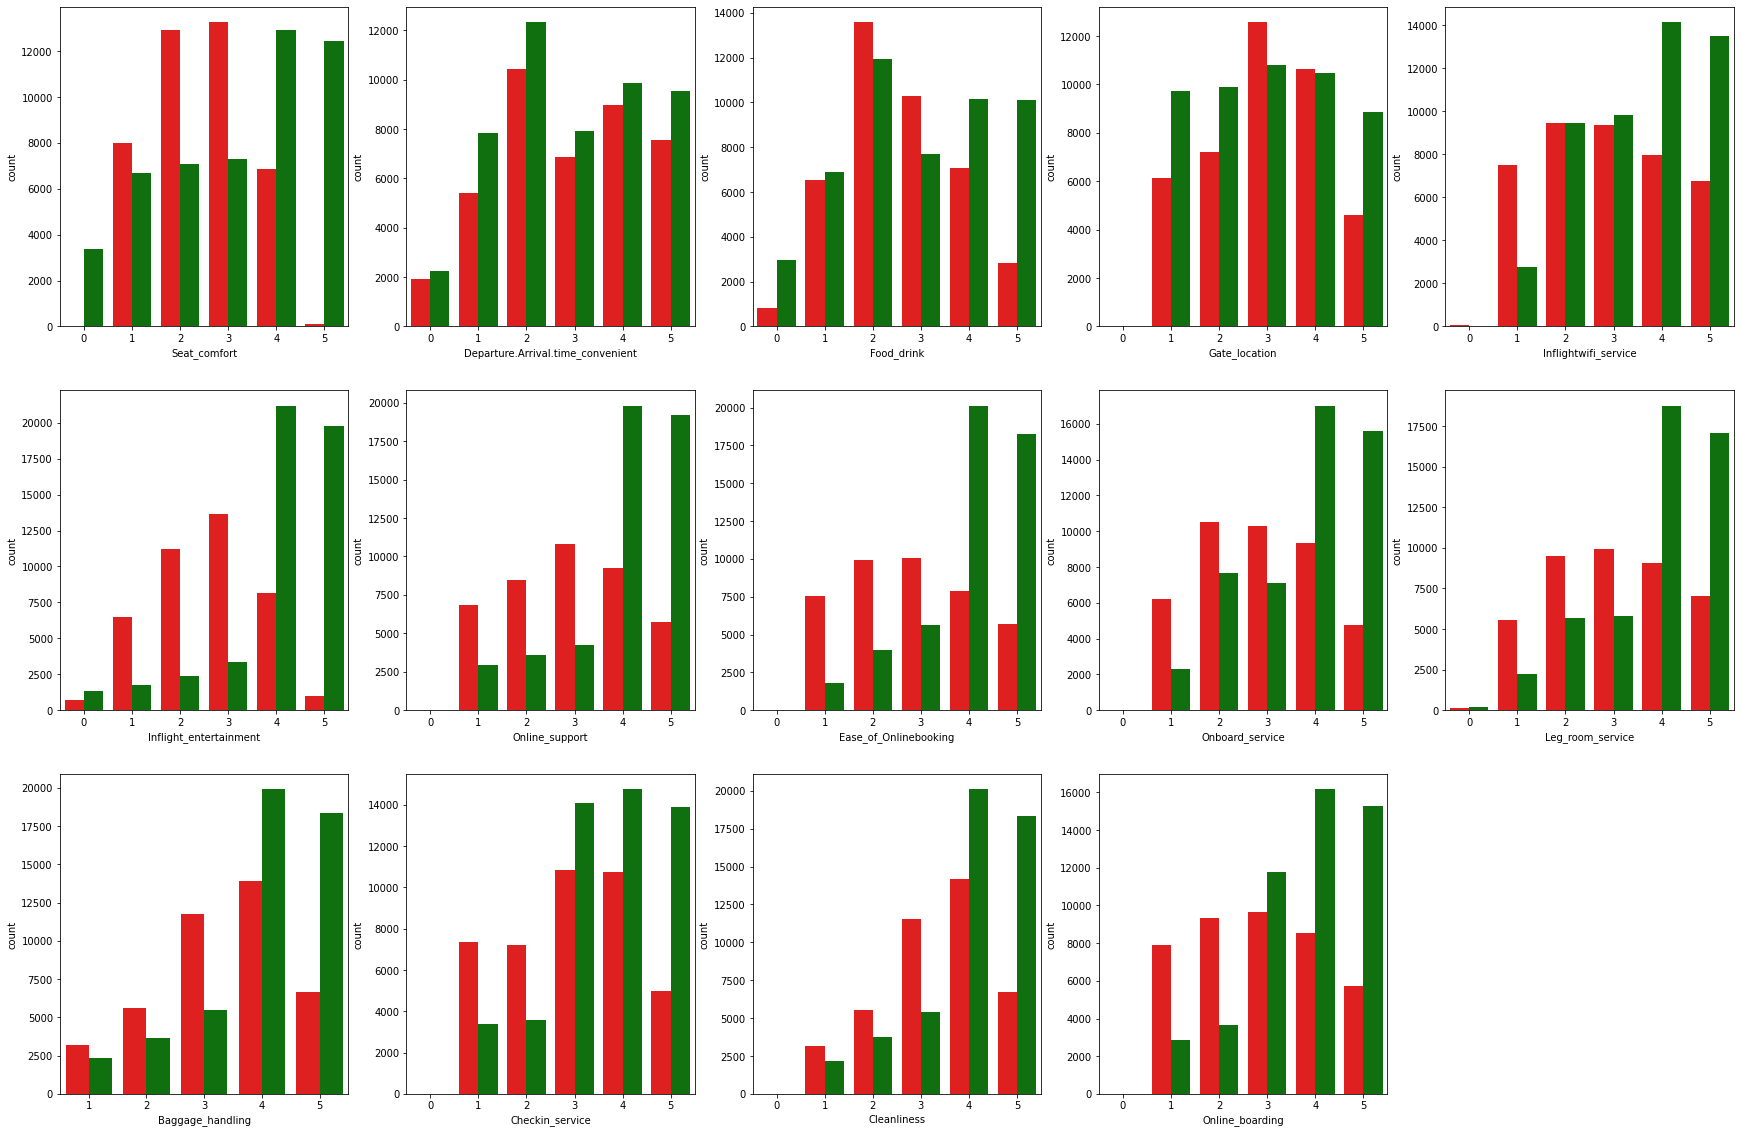

In [0]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(df[i], hue = df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one   

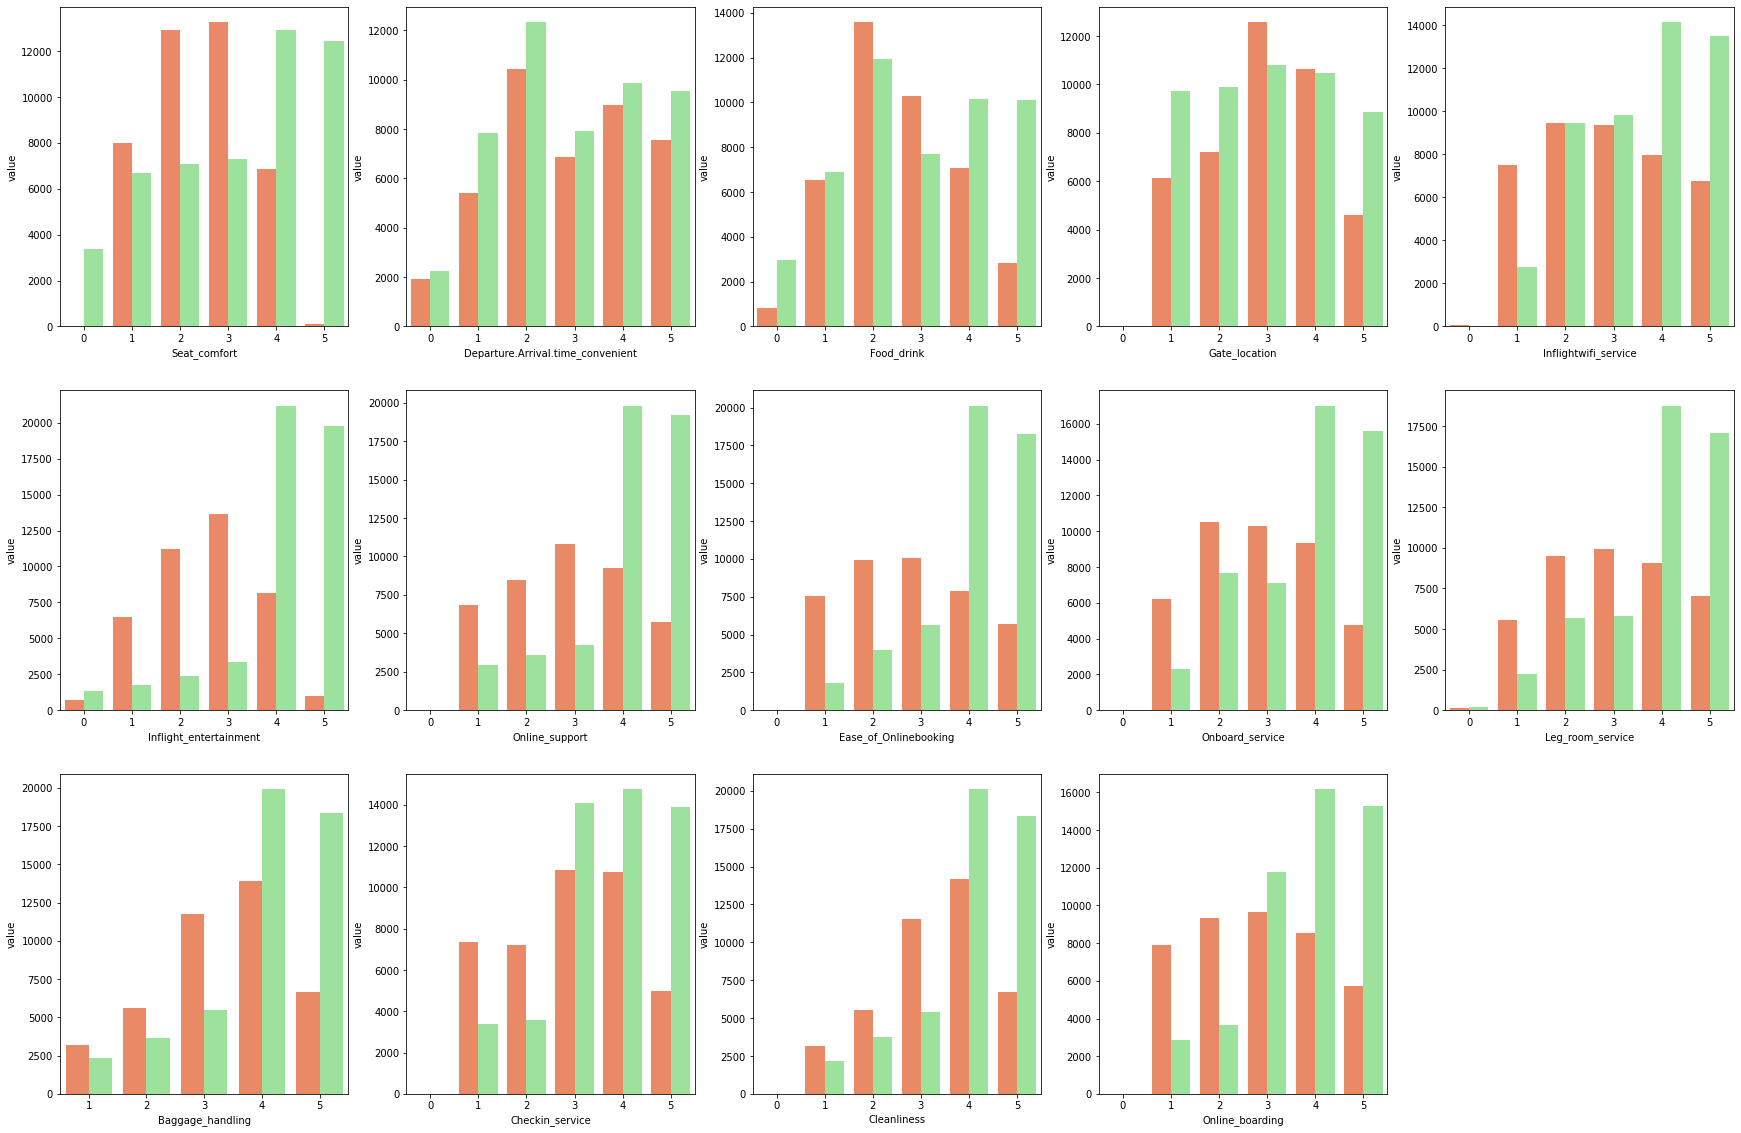

In [0]:
# Alternate way
# Using sns.barplot()

plt.figure(figsize= (30,20))  
pos = 1  

for i in feedback:
    ct = pd.crosstab(df[i], df.Satisfaction)  # Crosstab 
    stacked =ct.stack().reset_index().rename(columns={0:'value'}) #dataframe with name and count accross satisfaction levels
    plt.subplot(3, 5, pos)
    sns.barplot(x=stacked[i], y=stacked.value, hue=stacked.Satisfaction,
               palette = {'satisfied':'lightgreen','neutral or dissatisfied': 'coral'}) # Barplot
    plt.legend().remove()  # Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one 

# Model building and evaluation

### 14. Encode the columns "Gender", "CustomerType", "TypeTravel", "Class", "Satisfaction" 
- Use manual encoding or other type of encoding

In [0]:
# Number of classes in each of the categorical attributes
for i in df.columns:
    if df[i].dtype == 'O':
        print(i, '->', len(df[i].value_counts()))

Satisfaction -> 2
Gender -> 2
CustomerType -> 3
TypeTravel -> 3
Class -> 3


In [0]:
df.Class.value_counts()

Business    43535
Eco         40758
Eco Plus     6624
Name: Class, dtype: int64

In [0]:
#Manuanl Encoding
df.replace({'Loyal Customer' : 1, 'disloyal Customer' : 0,
               'Business travel' : 1, 'Personal Travel' : 0,
              'Female' : 0, 'Male' : 1,
               'satisfied' : 1, 'neutral or dissatisfied' : 0, 'Eco Plus': 0 , 'Eco': 1, 'Business': 2}, inplace = True)
               

In [0]:
#onehotencoding
df_coded = pd.get_dummies(df)

In [0]:
df.isnull().sum()

Satisfaction                         0
Seat_comfort                         0
Departure.Arrival.time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Gender                               0
CustomerType                         0
Age                                  0
TypeTravel                           0
Class                                0
Flight_Distance                      0
DepartureDelayin_Mins                0
ArrivalDelayin_Mins                  0
dtype: int64

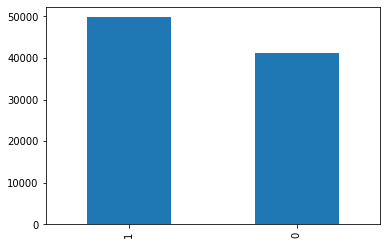

In [0]:
pd.value_counts(df['Satisfaction']).plot(kind='bar')

In [0]:
X = df.iloc[:,1:]
y = df['Satisfaction']


# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(63641, 22)
(27276, 22)


In [0]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train )

ypred = model.predict(X_test)

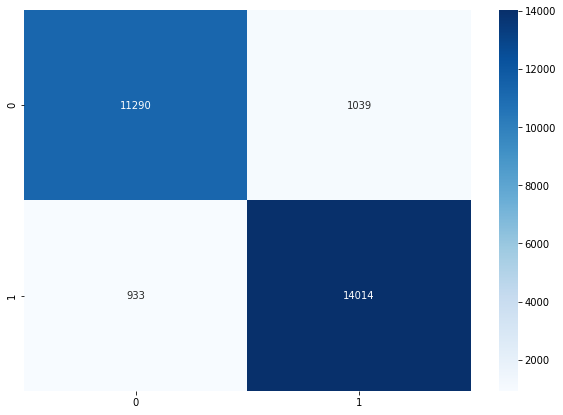

In [0]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, ypred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

# Model Tuning

### 19. Print cross validation score
- Decision tree model trained using all the attributes
- Random Forest model trained using all the attributes
- Fine tuned (using Grid Search or Random Search) Random Forest model

**Display all the scores above with their respective models in a single dataframe**



Cross Validation Score

In [0]:
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()
score1 = cross_val_score(dt, X, y, cv = 10).mean()
print(f'Cross validation score of Decision tree = {score1}')

Cross validation score of Decision tree = 0.9284580364906093


In [0]:
#Random Forest rf
rf = RandomForestClassifier() 
score2 = cross_val_score(rf, X, y, cv = 10).mean()
print(f'Cross validation score of Random forest = {score2}')

Cross validation score of Random forest = 0.9526050744771919


# Parameter Tuning Using GridDSearch

Doing it only for RandomForest as the mean CV score is better.

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8],
 'n_estimators': [100]}


clf = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X, y)

clf.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 18.6min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 24.4min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [0]:
rf = RandomForestClassifier(bootstrap= True,
 max_depth= 30,
 max_features= 'auto',
 min_samples_leaf= 1,
 n_estimators= 100)

rf.fit(X_train, y_train)

score7 = cross_val_score(rf, X_train, y_train, cv = 5).mean()


score7
    

0.9488851839578618

In [0]:
pred = rf.predict(X_test)

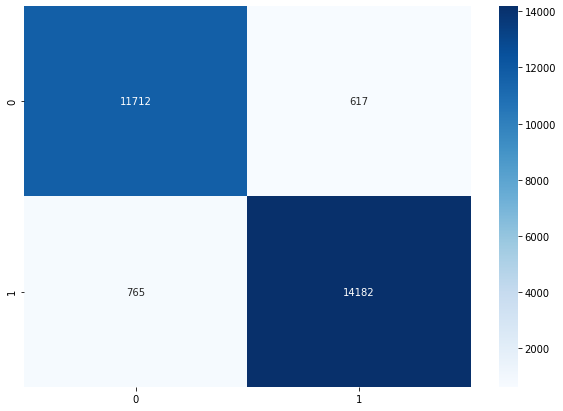

In [0]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

# Pipeline - Automate and Simplyfy the process

In [0]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.3MB/s 


In [0]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder



numeric_features = ['Age', 'Flight_Distance', 'DepartureDelayin_Mins'
       ]

feedback_features = ['Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
       'Gate_location', 'Inflightwifi_service', 'Inflight_entertainment',
       'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Cleanliness', 'Online_boarding']

other_cat_cols =  ['Gender', 'CustomerType', 'TypeTravel', 'Class']


#TRANSFORMERS



numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


feedback_feature_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('label_encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())])


other_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='not_captured')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('feed_col', feedback_feature_transformer, feedback_features),
        ('other_cat_col', other_cat_transformer, other_cat_cols )
    ])

In [0]:
#Adding into Pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(bootstrap= True,max_depth= 30,max_features= 'auto',min_samples_leaf= 1,n_estimators= 100))])

In [0]:
#Taking the raw data
data = df2.set_index("Id").join(df1.set_index("ID"))


In [0]:
#Getting X and y
X1 = data.drop(['Satisfaction', 'ArrivalDelayin_Mins'], axis = 1)
y1 = pd.get_dummies(data['Satisfaction'])

In [0]:
#Data SPlit
X_trains, X_tests, y_trains, y_tests = train_test_split(X1,y1, random_state = 1, stratify = y)

In [0]:
#Fitting Pipeline 
clf.fit(X_trains, y_trains)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                               

In [0]:
#Getting score 
clf.score(X_tests, y_tests)

0.9507699076110867

# Explore - 

# Dimensionality Reduction

###  Perform the following tasks

- Use PCA to reduce the number of dimensions such that the components capture 95% of the data
- Train Logistic Regression, Decision Tree and Random Forest using the principle components
- Calculate the accuracy scores for each of the models
- Calculate the cross validation scores for each of the above models trained using principle components

In [0]:
# We need to scale the data before using PCA which we have already done before


In [0]:
from sklearn.decomposition import PCA
pca = PCA(10)# Initialize PCA object
#pca = PCA(.95)
pca.fit(X_train)  # Fit the PCA object with the train data

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
X_train_pca = pca.transform(X_train)  # PCs for the train data
X_test_pca = pca.transform(X_test)    # PCs for the test data

X_train_pca.shape, X_test_pca.shape

((68187, 10), (22730, 10))

In [0]:
pca.explained_variance_

array([3.89741649, 2.45443514, 2.10683007, 1.30425851, 1.04462374,
       0.99329048, 0.89384752, 0.78441823, 0.63924023, 0.54545331])

In [0]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
score9 = lr.score(X_test_pca, y_test)


dt = DecisionTreeClassifier()
dt.fit(X_train_pca, y_train)
score10 = dt.score(X_test_pca, y_test)

rf = RandomForestClassifier(bootstrap = True, max_depth = 30, max_features ='auto', min_samples_leaf = 1, n_estimators = 100)
rf.fit(X_train_pca, y_train)
score11 = rf.score(X_test_pca, y_test)

In [0]:
score11

0.8836779586449626

In [0]:
lr = LogisticRegression()
score12 = cross_val_score(lr,X_train_pca, y_train , cv = 5).mean()

dt = DecisionTreeClassifier()
score13 = cross_val_score(dt, X_train_pca, y_train, cv = 5).mean()

rf = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features ='sqrt', min_samples_leaf = 1, n_estimators = 100)
score14 = cross_val_score(rf, X_train_pca, y_train, cv = 5).mean()

In [0]:
result = pd.DataFrame({'Algorithm' : ['Logistic Regression', 'Deision Tree', 'Random Forest'],
                      'Accuracy_score': [score9, score10, score11],
                      'Cross_val_score' : [score12, score13, score14]})
result

,Algorithm,Accuracy_score,Cross_val_score
0,Logistic Regression,0.801452,0.802616
1,Deision Tree,0.818742,0.820611
2,Random Forest,0.883678,0.864637


- You can cluster different segments of customer to get more insights about their behaviours.
- Create new features and select the best features to improve your model further.

and more ----

-----

# Outliers

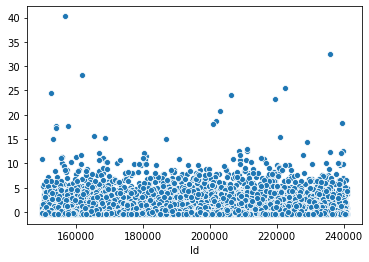

In [0]:
sns.scatterplot(X_train.index, X_train['ArrivalDelayin_Mins'].values)

In [0]:
## Define features where you want to check and remove outliers.
numeric_features2 = ['Age', 'Flight_Distance', 'ArrivalDelayin_Mins']

In [0]:
def remove_outlier(df_in, cols):
    for col in cols:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        low_bar  = q1-1.5*iqr
        high_bar = q3+1.5*iqr
        
        df_in = df_in.loc[(df_in[col] > low_bar) & (df_in[col] < high_bar)]
    df_out = df_in
    return df_out

In [0]:
x = remove_outlier(X_train, numeric_features2)

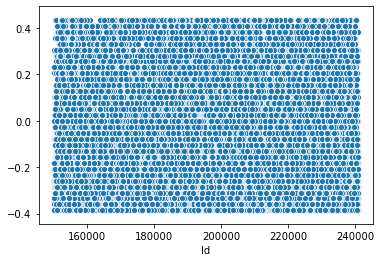

In [0]:
sns.scatterplot(x.index, x['ArrivalDelayin_Mins'].values)

In [0]:
x.isna().sum()

Seat_comfort                         0
Departure.Arrival.time_convenient    0
Food_drink                           0
Gate_location                        0
Inflightwifi_service                 0
Inflight_entertainment               0
Online_support                       0
Ease_of_Onlinebooking                0
Onboard_service                      0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Cleanliness                          0
Online_boarding                      0
Gender                               0
CustomerType                         0
Age                                  0
TypeTravel                           0
Class                                0
Flight_Distance                      0
ArrivalDelayin_Mins                  0
dtype: int64